In [1]:
import pandas as pd
#from functions import process
import numpy as np
from matplotlib import pyplot as plt
import collections
from tqdm import tqdm
#from scipy.stats import gaussian_kde
#from itertools import combinations 
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.metrics import pairwise_distances
#from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
DTI_final=pd.read_csv('data/DTI_index.csv')

In [3]:
reference = DTI_final[['target','drug']]
ctr = sorted(collections.Counter(collections.Counter(reference['target']).values()).items())
ctr_t = sorted(collections.Counter(collections.Counter(reference['drug']).values()).items())

def per(y, lim):
    per = []
    for i in range(1,lim):
        p = sum(y[0:i])/sum(y)
        per = np.append(per, p)
    return per

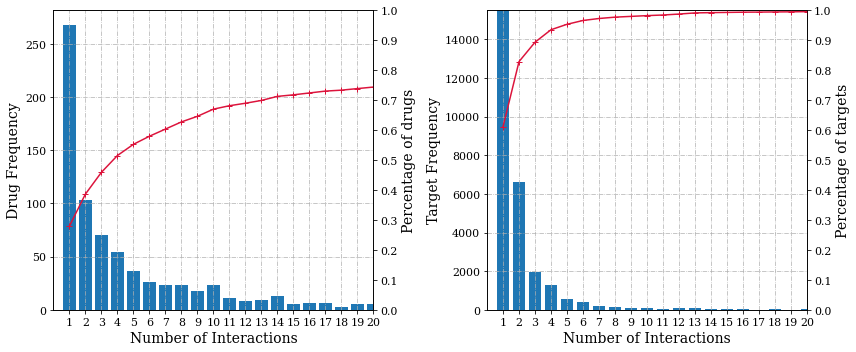

In [4]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

x, y = zip(*ctr) # unpack a list of pairs into two tuples
x_t, y_t = zip(*ctr_t) # unpack a list of pairs into two tuples

percent = per(y, 21)
percent_t = per(y_t, 21)

# Subplot 1
axs[0].bar(x,y)
axs[0].tick_params(axis="x", labelsize=11)
axs[0].tick_params(axis="y", labelsize=11)
axs[0].set_ylabel('Drug Frequency', fontsize = 14)
axs[0].set_xlabel('Number of Interactions', fontsize = 14)
axs[0].grid(linestyle='-.', linewidth=0.7)
axs[0].set_xlim([0,20])
axs[0].set_xticks(np.arange(1, 21, 1))
# Twin axis
axs0 = axs[0].twinx()
axs0.plot(x[0:20], percent ,marker='+', color='crimson')
axs0.set_ylim([0,1])
axs0.set_yticks(np.arange(0, 1.1, 0.1))
axs0.tick_params(axis='y', labelsize=11)
axs0.set_ylabel('Percentage of drugs', fontsize = 14)

# Subplot 2
axs[1].bar(x_t,y_t)
axs[1].tick_params(axis="x", labelsize=11)
axs[1].tick_params(axis="y", labelsize=11)
axs[1].set_ylabel('Target Frequency', fontsize = 14)
axs[1].set_xlabel('Number of Interactions', fontsize = 14)
axs[1].grid(linestyle='-.', linewidth=0.7)
axs[1].set_ylim([0,15500])
axs[1].set_xlim([0,20])
axs[1].set_xticks(np.arange(1, 21, 1))
# Twin axis
axs1 = axs[1].twinx()
axs1.plot(x_t[0:20], percent_t ,marker='+', color='crimson')
axs1.set_ylim([0,1])
axs1.set_yticks(np.arange(0, 1.1, 0.1))
axs1.tick_params(axis='y', labelsize=11)
axs1.set_ylabel('Percentage of targets', fontsize = 14)
plt.tight_layout()

#plt.savefig('data/plots/data_overview.png', dpi=1000, format = 'png', bbox_inches='tight')

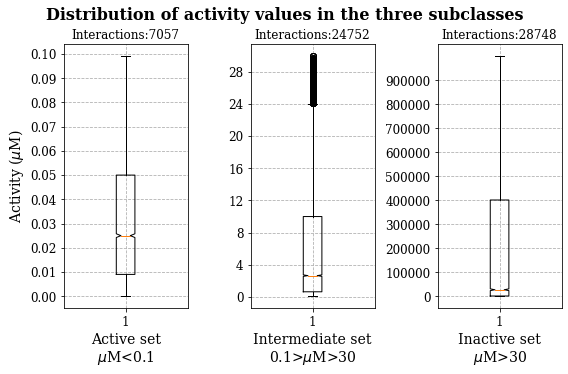

In [15]:
#final_clean_DTI = pd.read_csv('data/primary_data/final_clean_DTI.csv')
fig, ax = plt.subplots(1,3,figsize=(8,5))
fig.suptitle('Distribution of activity values in the three subclasses',fontweight = 'bold',  fontsize=16,y=1.03)

ax[0].set_title('Interactions:%s'%(collections.Counter(DTI_final['IC50']<0.1)[1]))
ax[0].boxplot(DTI_final['IC50'][DTI_final['IC50']<0.1], notch=True)
ax[0].set_yticks(np.arange(0, 0.11, 0.01))
ax[0].set_ylabel('Activity ('+ r'$\mu$'+'M)', fontsize = 14)

ax[1].set_title('Interactions:%s'%(collections.Counter((DTI_final['IC50']>0.1)&(DTI_final['IC50']<30))[1]))
ax[1].boxplot(DTI_final['IC50'][(DTI_final['IC50']>0.1)&(DTI_final['IC50']<30)], notch=True)
ax[1].set_yticks(np.arange(0, 30, 4))

ax[2].set_title('Interactions:%s'%(collections.Counter(DTI_final['IC50']>30)[1]))
ax[2].boxplot(DTI_final['IC50'][DTI_final['IC50']>30], notch=True, showfliers=False)
ax[2].set_yticks(np.arange(0, 1000000, 100000))

for axis,name in zip(ax,[r'Active set%s$\mu$M<0.1'%'\n', r'Intermediate set%s0.1>$\mu$M>30'%'\n', r'Inactive set%s$\mu$M>30'%'\n']):
    axis.set_xlabel(name, fontsize=14)
    axis.grid(linestyle='--')
    axis.tick_params(axis="x", labelsize=12)
    axis.tick_params(axis="y", labelsize=12) 

fig.tight_layout()
plt.show()

In [7]:
collections.Counter(DTI_final['IC50']>25)

Counter({False: 31725, True: 29899})